## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

TensorFlow is already loaded. Please restart the runtime to change versions.


In [1]:
%tensorflow_version  2.x
import tensorflow as tf
import numpy as np
tf.__version__

TensorFlow 2.x selected.


'2.1.0-rc1'

In [2]:
tf.__version__

'2.1.0-rc1'

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

32768/29515 [=================================] - 0s 0us/step


Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
 





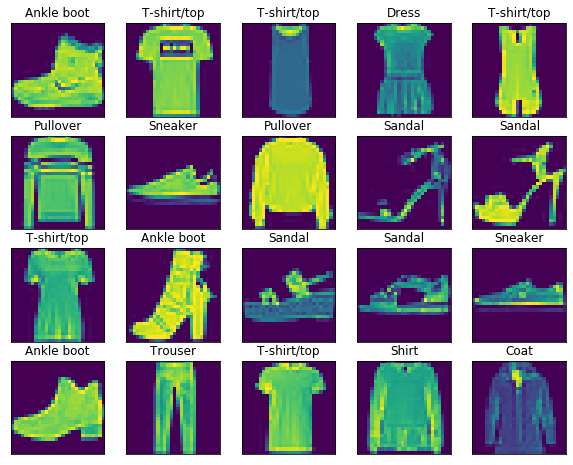

In [21]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(x_train[i] )
    plt.title( target_dict[(y_train[i]) ])
    plt.xticks([])
    plt.yticks([])

###4. Find no.of samples in training and test dataset

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
x_test.shape

(10000, 28, 28)

###5. Find dimensions of an image in the dataset

In [13]:
x_train[0].shape

(28, 28)

### 6. Verify if existing labels/Classes are correct 

<Figure size 720x720 with 0 Axes>

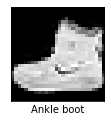

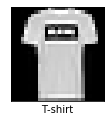

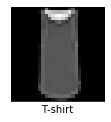

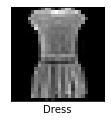

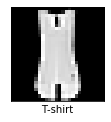

In [27]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.figure(figsize=(10,10))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_norm = x_train/np.float32(255)

x_test_norm = x_test/np.float32(255)


In [38]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [39]:
x_train_norm



array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

###10. Import the necessary layers from keras to build the model

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [41]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))


#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))


#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
model.fit(x_train_norm,trainY,          
          validation_data=(x_test_norm,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 275us/sample - loss: 0.3653 - accuracy: 0.8686 - val_loss: 0.2978 - val_accuracy: 0.8926
Epoch 2/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2145 - accuracy: 0.9208 - val_loss: 0.2673 - val_accuracy: 0.8994
Epoch 3/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1429 - accuracy: 0.9468 - val_loss: 0.2704 - val_accuracy: 0.9099
Epoch 4/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0876 - accuracy: 0.9678 - val_loss: 0.3333 - val_accuracy: 0.9111
Epoch 5/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0530 - accuracy: 0.9806 - val_loss: 0.3806 - val_accuracy: 0.9124
Epoch 6/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0372 - accuracy: 0.9868 - val_loss: 0.4451 - val_accuracy: 0.9118
Epoch 7/10
60000/60000 [====================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [45]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model1 = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model1.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model1.add(tf.keras.layers.BatchNormalization())
#Add first convolutional layer
model1.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model1.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))



#Add MaxPooling layer
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#Add another dropout layer
model1.add(tf.keras.layers.Dropout(0.25))

#Flatten the output
model1.add(tf.keras.layers.Flatten())

#Dense layer
model1.add(tf.keras.layers.Dense(128, activation='relu'))


#Output layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
model1.fit(x_train_norm,trainY,          
          validation_data=(x_test_norm,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 168us/sample - loss: 0.3504 - accuracy: 0.8740 - val_loss: 0.2705 - val_accuracy: 0.9017
Epoch 2/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2252 - accuracy: 0.9165 - val_loss: 0.2538 - val_accuracy: 0.9095
Epoch 3/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.1791 - accuracy: 0.9336 - val_loss: 0.2254 - val_accuracy: 0.9209
Epoch 4/5
60000/60000 [==============================] - 9s 151us/sample - loss: 0.1433 - accuracy: 0.9465 - val_loss: 0.2328 - val_accuracy: 0.9232
Epoch 5/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.1139 - accuracy: 0.9570 - val_loss: 0.2517 - val_accuracy: 0.9248


###13. Verify accuracy of the model

> 

In [48]:
score = model1.evaluate(x_test_norm, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25166608752459285
Test accuracy: 0.9248


In [0]:
# save model
model1.save('final_model.h5')

####14. Verify performance of your model selectively 

In [0]:
x_train_reshaped = tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,))

In [0]:
predictions = model1.predict(x_train_norm)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

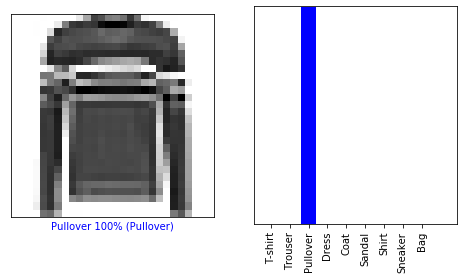

In [78]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:

x_train_reshaped = tf.keras.backend.expand_dims(x_train_norm, axis = -1)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,rotation_range=45)

datagen.fit(x_train_reshaped)



####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

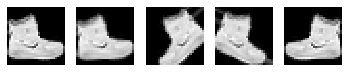

In [87]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_reshaped[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()